# Proyek Analisis Data E-Commerce Public
- Oleh: Muhamad Fadhly Rafiansyah
- Email: rafiabang@gmail.com
- ID Dicoding: fadhlyrafi

### Menentukan Pertanyaan Bisnis

1. Bagaimana Perkembangan Penjualan Setiap Bulan dalam Setiap Tahun?
2. Kategori Produk Apa yang Paling Laris di Pasar?
3. Bagaimana Performa Status Pesanan?

### Import Semua Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from unidecode import unidecode

### Data Wrangling

#### Gathering Data

In [3]:
# Gathering Data
customers_df = pd.read_csv("data/customers_dataset.csv")
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
orders_df = pd.read_csv("data/orders_dataset.csv")
category_df = pd.read_csv("data/product_category_name_translation.csv")
product_df = pd.read_csv("data/products_dataset.csv")
sellers_df = pd.read_csv("data/sellers_dataset.csv")


**Insight:**
- Mengimpor semua file .csv ke dalam dataframe

#### Assesing Data

In [4]:
# Membuat function untuk menilai tabel
def evaluate_table(df, table_name):
    print(f"--- {table_name} ---")
    df.info()
    print("\nJumlah nilai yang hilang:")
    print(df.isna().sum())
    print("\nJumlah duplikasi: ", df.duplicated().sum())
    print("\n" + "-"*50 + "\n")


In [5]:
# Menilai tabel customers
evaluate_table(customers_df, "Customers")
# Aman, tidak ada masalah

--- Customers ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Jumlah nilai yang hilang:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah duplikasi:  0

--------------------------------------------------



In [6]:
# Menilai tabel Geolocation
evaluate_table(geolocation_df, "Geolocation")
# Banyak duplikasi namun ini bukan kesalahan, karena nama kota sama
# Setelah dilihat dari nilainya, ada 2 macam nama yang harusnya sama: sao paulo dan sa~o paulo

# Cleaning Data: ganti sa~o paulo menjadi sao paulo atau sebaliknya

--- Geolocation ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

Jumlah nilai yang hilang:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Jumlah duplikasi:  261831

--------------------------------------------------



In [7]:
# Menilai tabel Order Items
evaluate_table(order_items_df, "Order Items")
# Aman, tidak ada masalah

--- Order Items ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

Jumlah nilai yang hilang:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah duplikasi:  0

--------------------------------------------------



In [8]:
# Menilai tabel Order Payments
evaluate_table(order_payments_df, "Order Payments")
# Aman, tidak ada masalah

--- Order Payments ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

Jumlah nilai yang hilang:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah duplikasi:  0

--------------------------------------------------



In [9]:
# Menilai tabel Order Reviews
evaluate_table(order_reviews_df, "Order Reviews")

# Banyak yang tidak memberikan judul review dan isi review,
# Cleaning Data: jadikan "No Comment" dan "No Title"

--- Order Reviews ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

Jumlah nilai yang hilang:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Jumlah duplikasi:  0

-------------------------------------------------

In [10]:
# Menilai tabel Orders
evaluate_table(orders_df, "Orders")

# Berdasarkan Analisis, ada beberapa kolom yang nilainya hilang, kemungkinan karena:
# order_approved_at: Kosong jika pesanan belum disetujui oleh penjual.
# order_delivered_carrier_date: Kosong jika pesanan belum dikirim oleh kurir.
# order_delivered_customer_date: Kosong jika pesanan belum diterima oleh pelanggan.

--- Orders ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

Jumlah nilai yang hilang:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date  

In [11]:
# Menilai tabel Category
evaluate_table(category_df, "Category")

# Tabel Tambahan untuk mengetahui terjemahan informasi kategori
# Aman, tidak ada masalah

--- Category ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

Jumlah nilai yang hilang:
product_category_name            0
product_category_name_english    0
dtype: int64

Jumlah duplikasi:  0

--------------------------------------------------



In [12]:
# Menilai tabel Product
evaluate_table(product_df, "Product")

# Berdasarkan Analisis, ada beberapa kolom yang nilainya hilang:
# product_category_name         610
# product_name_lenght           610
# product_description_lenght    610
# product_photos_qty            610
# product_weight_g                2
# product_length_cm               2
# product_height_cm               2
# product_width_cm                2
# Cleaning data, jadikan "Unknown"

--- Product ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

Jumlah nilai yang hilang:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610


In [13]:
# Menilai tabel Sellers
evaluate_table(sellers_df, "Sellers")
# Aman, tidak ada masalah

--- Sellers ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

Jumlah nilai yang hilang:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Jumlah duplikasi:  0

--------------------------------------------------



#### Cleaning Data

**Tabel Geolocation**

In [14]:
# Membersihkan nama kota di kolom geolocation_city dan menghapus diakritik
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].apply(lambda x: unidecode(x.lower()))


In [15]:
# Mencari nilai yang mengandung variasi "sao paulo" dengan karakter aksen
mask = geolocation_df['geolocation_city'].str.contains(r'são?paulo', case=False, na=False)

# Menampilkan hasil yang cocok
print(geolocation_df[mask]['geolocation_city'].unique())

# Mencari nilai yang mengandung variasi "sao paulo" biasa
mask = geolocation_df['geolocation_city'].str.contains(r'sao?paulo', case=False, na=False)

# Menampilkan hasil yang cocok
print(geolocation_df[mask]['geolocation_city'].unique())

[]
['saopaulo']


*Berhasil, kata são paulo tidak ada lagi!*

**Tabel Order Reviews**

In [16]:
# Mengganti nilai NaN pada 'review_comment_title' dengan "No Title"
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('No Title')

# Mengganti nilai NaN pada 'review_comment_message' dengan "No Comment"
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('No Comment')

# Verifikasi perubahan
print(order_reviews_df[['review_comment_title', 'review_comment_message']].isnull().sum())

review_comment_title      0
review_comment_message    0
dtype: int64


*Berhasil, semua kolom telah terisi!*

**Tabel Product**

In [17]:
# Mengganti nilai NaN dengan median pada kolom ukuran
product_df['product_weight_g'].fillna(product_df['product_weight_g'].median())
product_df['product_length_cm'].fillna(product_df['product_length_cm'].median())
product_df['product_height_cm'].fillna(product_df['product_height_cm'].median())
product_df['product_width_cm'].fillna(product_df['product_width_cm'].median())

# Mengganti nilai NaN dengan "Unknown" pada kolom yang memiliki nilai hilang
product_df['product_category_name'] = product_df['product_category_name'].fillna('Unknown')
product_df['product_name_lenght'] = product_df['product_name_lenght'].fillna('Unknown')
product_df['product_description_lenght'] = product_df['product_description_lenght'].fillna('Unknown')
product_df['product_photos_qty'] = product_df['product_photos_qty'].fillna('Unknown')

# Verifikasi perubahan
print(product_df[['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].isnull().sum())



product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              2
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64


*Berhasil semuanya bersih!*

### Exploratory Data Analysis (EDA), Visualisasi, dan Explanatory Analysis

#### Explore Tabel Order Items (**Perkembangan Penjualan tiap Bulan Setiap Tahunnya**)

    year  month_num      month       price  freight_value      month_year
0   2016          9  September      194.47          24.05  September 2016
1   2016         10    October    49580.55        7364.52    October 2016
2   2016         12   December       10.90           8.72   December 2016
3   2017          1    January    80124.74       12073.67    January 2017
4   2017          2   February   245982.01       36749.51   February 2017
5   2017          3      March   343242.60       53299.79      March 2017
6   2017          4      April   308148.32       44697.44      April 2017
7   2017          5        May   505655.46       80566.33        May 2017
8   2017          6       June   469001.05       74622.07       June 2017
9   2017          7       July   465282.10       79568.07       July 2017
10  2017          8     August   560093.34       96150.99     August 2017
11  2017          9  September   617046.12       94568.55  September 2017
12  2017         10    October   65802

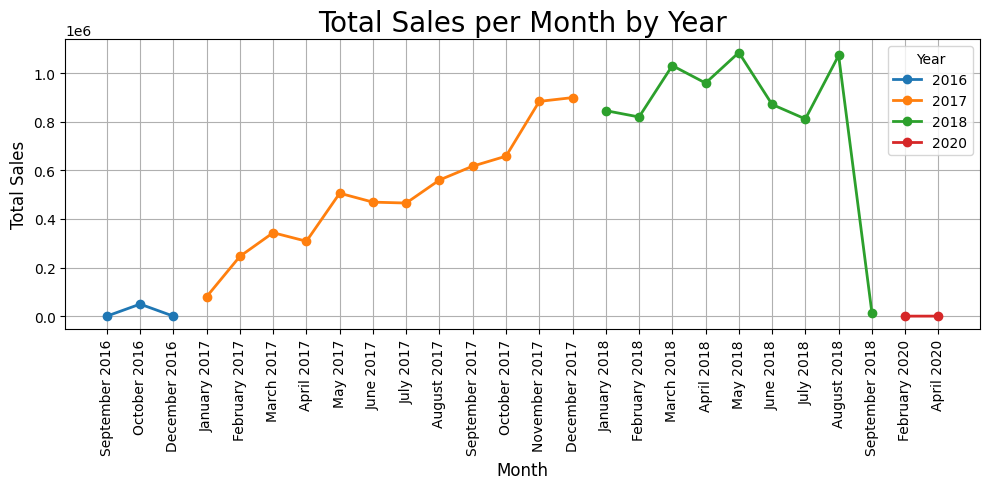

In [18]:
# Mengonversi 'shipping_limit_date' ke format datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

# Menambahkan kolom bulan dan tahun
order_items_df['month'] = order_items_df['shipping_limit_date'].dt.strftime('%B')  # Nama bulan
order_items_df['year'] = order_items_df['shipping_limit_date'].dt.year  # Tahun
order_items_df['month_num'] = order_items_df['shipping_limit_date'].dt.month  # Nomor bulan

# Mengelompokkan data berdasarkan tahun, bulan, dan menghitung total penjualan per bulan
monthly_sales_df = order_items_df.groupby(['year', 'month_num', 'month']).agg({
    "price": "sum",  # Total penjualan berdasarkan harga
    "freight_value": "sum"  # Total nilai pengiriman (optional)
}).reset_index()

# Membuat kolom 'month_year' untuk mempermudah visualisasi
monthly_sales_df['month_year'] = monthly_sales_df['month'] + ' ' + monthly_sales_df['year'].astype(str)
print(monthly_sales_df)
# Mengurutkan data berdasarkan tahun dan bulan
monthly_sales_df.sort_values(by=['year', 'month_num'], inplace=True)

# Visualisasi perkembangan penjualan per bulan
plt.figure(figsize=(10, 5))

# Plot data untuk total penjualan berdasarkan harga ('price')
for year in monthly_sales_df['year'].unique():
    plt.plot(
        monthly_sales_df[monthly_sales_df['year'] == year]['month_year'],
        monthly_sales_df[monthly_sales_df['year'] == year]['price'],  # Total penjualan
        marker='o', linewidth=2,
        label=str(year)  # Menambahkan label tahun untuk legend
    )

# Menambahkan elemen visualisasi
plt.title("Total Sales per Month by Year", loc="center", fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.grid()  # Menambahkan grid untuk membantu visualisasi
plt.legend(title='Year')  # Menampilkan legend untuk tahun
plt.tight_layout()  # Menyesuaikan layout
plt.show()


#### Explore Tabel Products dan Order Items (**10 Kategori Product Terlaris**)

   ranking   product_category_name  total_item_sold
0        1         cama_mesa_banho            11115
1        2            beleza_saude             9670
2        3           esporte_lazer             8641
3        4        moveis_decoracao             8334
4        5  informatica_acessorios             7827


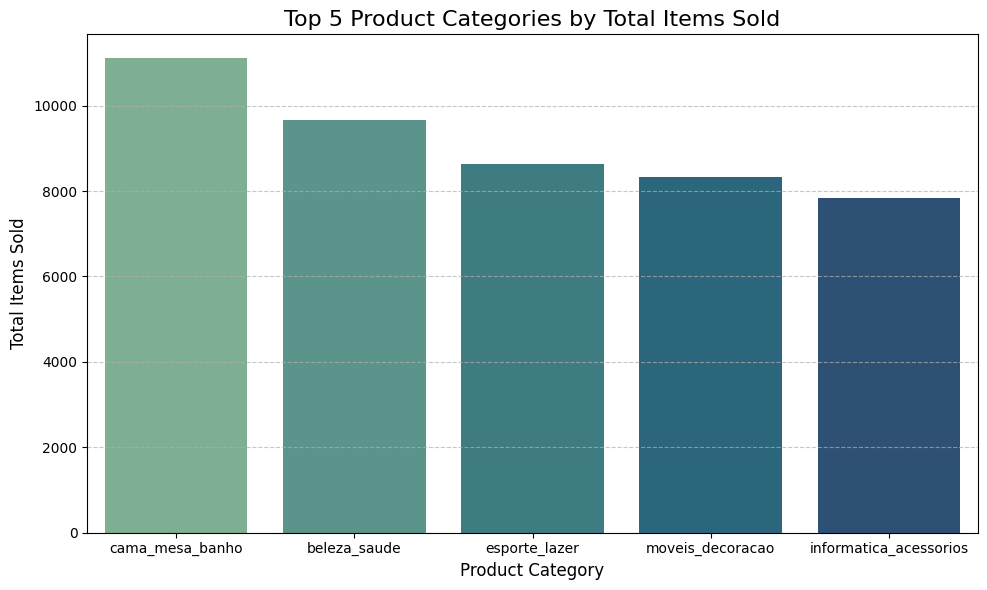

In [19]:
# Menggabungkan data antara order_items_df dan product_df berdasarkan product_id
merged_df = pd.merge(order_items_df, product_df, on='product_id', how='inner')

# Menghitung jumlah order untuk setiap kategori
category_order_count = merged_df.groupby('product_category_name')['order_item_id'].count()

# Mengurutkan kategori berdasarkan jumlah order terbanyak dan menampilkan 5 teratas
top_5_categories = category_order_count.sort_values(ascending=False).head(5)

# Membuat DataFrame untuk menampilkan hasil dalam format tabel
top_5_categories_df = top_5_categories.reset_index()

# Menambahkan kolom ranking
top_5_categories_df['ranking'] = top_5_categories_df.index + 1

# Mengatur kolom agar sesuai dengan urutan yang diinginkan
top_5_categories_df = top_5_categories_df[['ranking', 'product_category_name', 'order_item_id']]
top_5_categories_df.rename(columns={'order_item_id': 'total_item_sold'}, inplace=True)

# Menampilkan hasil tabel
print(top_5_categories_df)


# Menyiapkan data untuk bar chart
plt.figure(figsize=(10, 6))

# Menggunakan seaborn untuk membuat bar chart dan mengatur 'product_category_name' sebagai hue
sns.barplot(x='product_category_name', y='total_item_sold', hue='product_category_name', data=top_5_categories_df, palette='crest', legend=False)

# Menambahkan judul dan label sumbu
plt.title('Top 5 Product Categories by Total Items Sold', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Items Sold', fontsize=12)

# Menambahkan grid untuk visualisasi yang lebih jelas
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Menampilkan chart
plt.tight_layout()
plt.show()


#### Explore Tabel Orders (**Informasi Status Orders**)

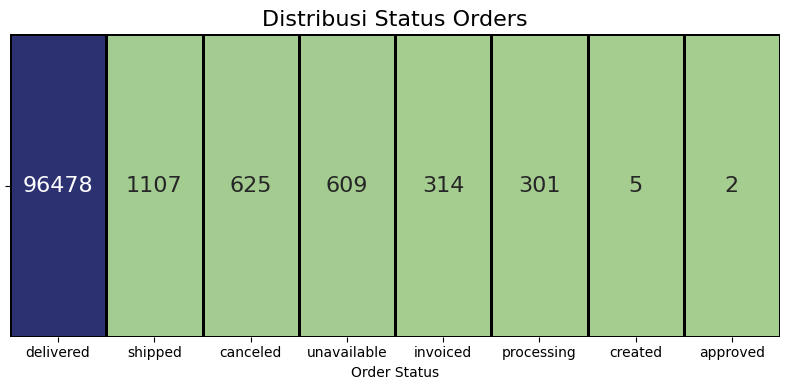

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah pesanan berdasarkan status
order_status_count = orders_df['order_status'].value_counts()

# Membuat DataFrame dari hasil
status_table = pd.DataFrame(order_status_count).reset_index()

# Menamai kolom agar lebih mudah dipahami
status_table.columns = ['Order Status', '']

# Menampilkan tabel menggunakan heatmap dengan warna yang berbeda di setiap kotak menggunakan palette
plt.figure(figsize=(8, 4))
sns.heatmap(status_table.set_index('Order Status').T, annot=True, cmap='crest', cbar=False, fmt='g',
            annot_kws={'size': 16}, linewidths=1, linecolor='black')  # Menambahkan garis pembatas
plt.title('Distribusi Status Orders', fontsize=16)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### Explore Tabel Order Reviews, Orders, Order Items, Products (**Produk dengan Rating Pelanggan Terbaik**)

                                    avg_review_score
product_category_name                               
cds_dvds_musicais                           4.642857
fashion_roupa_infanto_juvenil               4.500000
livros_interesse_geral                      4.446266
construcao_ferramentas_ferramentas          4.444444
flores                                      4.419355


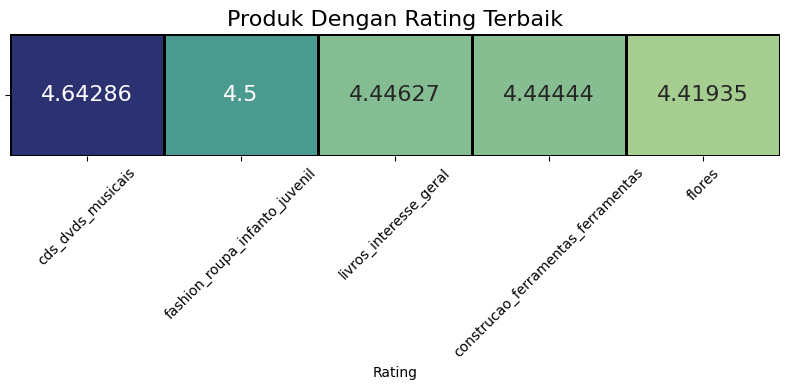

In [33]:
# Menggabungkan tabel order_reviews dan orders berdasarkan order_id
reviews_orders = pd.merge(order_reviews_df, orders_df, on='order_id', how='inner')

# Menggabungkan tabel reviews_orders dengan order_items berdasarkan order_id
reviews_orders_items = pd.merge(reviews_orders, order_items_df, on='order_id', how='inner')

# Menggabungkan tabel reviews_orders_items dengan products berdasarkan product_id
merged_df = pd.merge(reviews_orders_items, product_df, on='product_id', how='inner')

# Mengelompokkan data berdasarkan kategori produk
category_ratings = merged_df.groupby('product_category_name').agg(
    # total_orders=('order_id', 'count'),            # Menghitung jumlah order
    avg_review_score=('review_score', 'mean')     # Menghitung rata-rata rating
)

# Mengurutkan berdasarkan rating tertinggi
category_ratings = category_ratings.sort_values(by='avg_review_score', ascending=False).head(5)

# Menampilkan 10 kategori teratas
print(category_ratings.head(10))

# Membuat DataFrame dari hasil
status_table = pd.DataFrame(category_ratings).reset_index()

# Menamai kolom agar lebih mudah dipahami
status_table.columns = ['Rating', '']

# Menampilkan tabel menggunakan heatmap dengan warna yang berbeda di setiap kotak menggunakan palette
plt.figure(figsize=(8, 4))
sns.heatmap(status_table.set_index('Rating').T, annot=True, cmap='crest', cbar=False, fmt='g',
            annot_kws={'size': 16}, linewidths=1, linecolor='black')  # Menambahkan garis pembatas
plt.title('Produk Dengan Rating Terbaik', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### Prediksi-prediksi

1. Dari data "5 Produk dengan Rating Terbaik," kita bisa melihat bahwa kategori produk dengan rating tertinggi seperti cds_dvds_musicais dan fashion_roupa_infanto_juvenil kemungkinan akan terus mendominasi pasar produk-produk berkualitas tinggi. Produk-produk dalam kategori ini cenderung memiliki banyak ulasan positif, yang menunjukkan bahwa pelanggan menghargai kualitas produk dalam kategori tersebut. Prediksi: Kategori produk seperti musik dan fashion untuk anak-anak akan terus menjadi pilihan populer di masa depan.
2. Data "Total Penjualan Tiap Bulan Setiap Tahunnya" menunjukkan bahwa penjualan cenderung mengalami peningkatan yang signifikan pada bulan-bulan tertentu, terutama pada bulan-bulan seperti November, Desember, dan Mei. Berdasarkan data ini, kita dapat memprediksi bahwa bulan-bulan tersebut akan terus menjadi puncak penjualan, terutama menjelang akhir tahun dan liburan. Prediksi: Bulan November dan Desember kemungkinan akan mengalami lonjakan penjualan yang signifikan karena faktor musiman dan belanja liburan.
3. Berdasarkan data "5 Produk Terlaris," kategori produk seperti cama_mesa_banho (bed, bath, and table), beleza_saude (beauty and health), dan esporte_lazer (sports and leisure) mendominasi penjualan dengan angka penjualan yang tinggi. Dengan meningkatnya minat pada kesehatan dan gaya hidup, kategori-kategori ini diprediksi akan tetap populer di masa depan. Prediksi: Kategori produk seperti kesehatan, kecantikan, dan olahraga akan terus menjadi kategori yang laris, terutama di tengah perubahan pola hidup yang lebih sehat.

### Kesimpulan

Berdasarkan data yang tersedia, terdapat beberapa tren dan pola yang dapat diidentifikasi, yang memberikan gambaran mengenai perilaku penjualan dan preferensi konsumen:

1. Kategori produk dengan rating tertinggi, seperti cds_dvds_musicais dan fashion_roupa_infanto_juvenil, menunjukkan bahwa produk-produk berkualitas tinggi dengan ulasan positif terus menjadi pilihan utama konsumen. Hal ini menandakan bahwa kualitas produk menjadi faktor utama dalam menentukan kepuasan pelanggan dan pilihan belanja mereka.

2. Penjualan bulanan cenderung mengalami lonjakan signifikan pada bulan-bulan tertentu, terutama menjelang akhir tahun dan liburan, seperti bulan November, Desember, dan Mei. Ini menunjukkan bahwa faktor musiman, seperti liburan dan periode belanja akhir tahun, berpengaruh besar terhadap volume penjualan, yang bisa dimanfaatkan untuk merencanakan promosi atau diskon khusus.

3. Kategori produk seperti cama_mesa_banho, beleza_saude, dan esporte_lazer mendominasi penjualan dengan angka tinggi. Dengan adanya peningkatan minat terhadap gaya hidup sehat dan kebersihan, produk-produk dalam kategori ini diprediksi akan terus populer di masa depan, mencerminkan kecenderungan konsumen yang semakin fokus pada kesehatan dan kenyamanan.

Secara keseluruhan, tren ini menunjukkan pentingnya pemahaman terhadap preferensi konsumen dan faktor musiman dalam merencanakan strategi pemasaran dan penjualan. Mengoptimalkan kategori produk dengan rating tinggi, memanfaatkan bulan-bulan puncak penjualan, dan menjaga kualitas produk akan menjadi kunci kesuksesan di pasar yang kompetitif.